In [218]:
myvars = {}
with open("project db sql access") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [219]:
#python code to create SQL data to a dataframe
import MySQLdb
import pandas as pd

conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()
#Added a column,`Quality` to assign an int to Good(1), Moderate(2),Unhealthy days(3)
cursor.execute('Select * from `AQIEMS`')#Alter table `AQIEMS`add `Quality` INT Not null after`AQI`')
rows = cursor.fetchall()
data = list(rows)
datadf=pd.DataFrame(data)
datadf


,0,1,2,3,4,5,6,7,8,9
0,BREATHING PROBLEM,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
1,BREATHING PROBLEM,ST VINCENT HOSPITAL,INDIANAPOLIS,46260,Marion,2015-01-01,43,1,Good,PM2.5
2,NAUSEA,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
3,NAUSEA,INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL,BLOOMINGTON,47403,Monroe,2015-01-01,55,2,Moderate,PM2.5
4,WEAKNESS,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
...,...,...,...,...,...,...,...,...,...,...
139149,WEAKNESS,RIVERVIEW HEALTH,NOBLESVILLE,46060,Hamilton,2018-12-31,20,1,Good,PM2.5
139150,WEAKNESS,CLARK MEMORIAL HOSPITAL,JEFFERSONVILLE,47130,Clark,2018-12-31,22,1,Good,Ozone
139151,WEAKNESS,PERRY COUNTY MEMORIAL HOSPITAL,TELL CITY,47586,Perry,2018-12-31,22,1,Good,Ozone
139152,DYSPNEA,"COMMUNITY HOSPITAL SOUTH, INC.",INDIANAPOLIS,46227,Marion,2018-12-31,38,1,Good,PM2.5


In [220]:
##I exported the file to csv for easier coding.  This is an updated table with quality as a new column to give numerics to the category
import seaborn as sns
import csv
data = pd.read_csv('AQIEMS1.csv', index_col=0)
data

,Facility,City,ZIP Code,County,Date,AQI,Quality,Category,Defining Parameter
SYMPTOM_PRIMARY,,,,,,,,,
BREATHING PROBLEM,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
BREATHING PROBLEM,ST VINCENT HOSPITAL,INDIANAPOLIS,46260,Marion,2015-01-01,43,1,Good,PM2.5
NAUSEA,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
NAUSEA,INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL,BLOOMINGTON,47403,Monroe,2015-01-01,55,2,Moderate,PM2.5
WEAKNESS,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,2015-01-01,32,1,Good,PM2.5
...,...,...,...,...,...,...,...,...,...
WEAKNESS,RIVERVIEW HEALTH,NOBLESVILLE,46060,Hamilton,2018-12-31,20,1,Good,PM2.5
WEAKNESS,CLARK MEMORIAL HOSPITAL,JEFFERSONVILLE,47130,Clark,2018-12-31,22,1,Good,Ozone
WEAKNESS,PERRY COUNTY MEMORIAL HOSPITAL,TELL CITY,47586,Perry,2018-12-31,22,1,Good,Ozone


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: can't multiply sequence by non-int of type 'float'

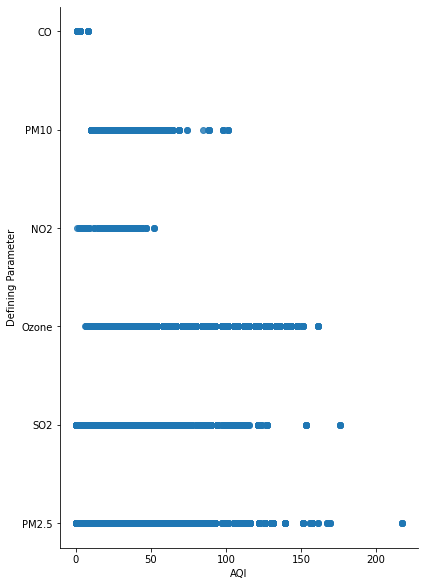

In [221]:
sns.pairplot(data, x_vars= ['AQI'], y_vars = ['Defining Parameter'], size = 8,aspect=0.7, kind='reg')
data.describe()

The mean of AQI is:  41.894922172557024
The standard deviation of AQI is: 18.264911140571904


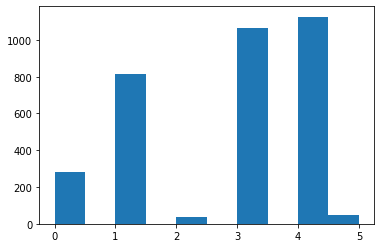

In [222]:
#Data is not normally distributed
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

elements = np.array(data['AQI'])
mean=np.mean(elements)
print('The mean of AQI is: ', mean)
sd = np.std(elements, axis=0)
print('The standard deviation of AQI is:',sd)

final_list =[x for x in elements if (x> (mean - (2 *sd)))]
final_list =[x for x in elements if (x< (mean - (2 *sd)))]
# print(final_list)
plt.hist(final_list)
# print(max(final_list))
# print(min(final_list))
plt.show()

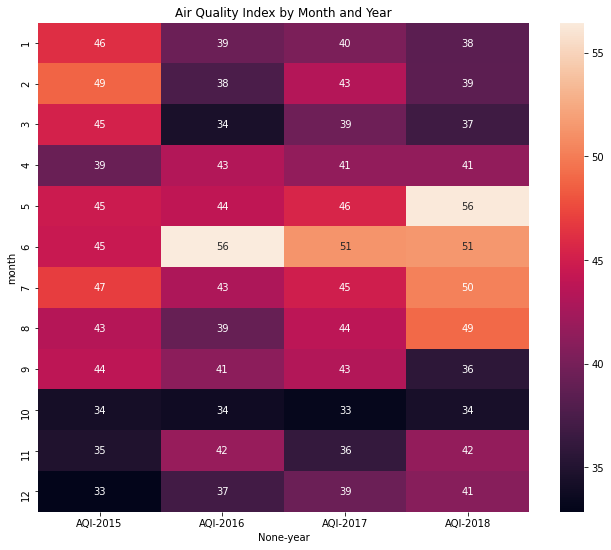

In [230]:
#Heatmap of air quality in various times of the year
df = pd.read_csv('AQIEMS1.csv', 
                 usecols=[5,6], names=['DATE', 'AQI'], 
                 skiprows=1, index_col=0, parse_dates=[0])
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['year', 'month']).mean()
title='Air Quality Index by Month and Year'
fig, ax = plt.subplots(figsize=(11, 9))
df_m = df_m.unstack(level=0)
plt.title(title)

sns.heatmap(df_m, annot=True)
plt.show()